In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

from features_preprocess import preprocess_cat_features
from create_cohort import Cohort
from utils import *

# Jupyter doesnt import again the module if it changed so we reload the module to overcome this
import importlib, sys
importlib.reload(sys.modules['features_preprocess'])
importlib.reload(sys.modules['create_cohort'])
importlib.reload(sys.modules['utils'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import warnings

warnings.filterwarnings('ignore')

# Extracting Cohort

In [ ]:
cohort = Cohort()
cohort.create_cohort()
df = cohort.df

# Basic Data Exploration

In [4]:
df.head()

,34-0.0,1299-0.0,1309-0.0,1349-0.0,1369-0.0,1408-0.0,2090-0.0,2100-0.0,2714-0.0,2724-0.0,...,has_infertility,has_lupus,has_menstrual_pain,has_back_pain,had_UTI,had_appendicitis,has_excessive_menstruation,has_PCOS,estrogen_exposure,diag_count
0,1961.0,3.0,2.0,3.0,1.0,3.0,0.0,0.0,12.0,0.0,...,0,0,1,1,0,0,1,0,NaN,8.0
1,1953.0,4.0,3.0,0.0,1.0,3.0,1.0,0.0,13.0,0.0,...,0,0,0,0,1,0,0,0,NaN,279.0
2,1961.0,2.0,3.0,1.0,1.0,2.0,0.0,0.0,10.0,1.0,...,0,0,1,0,1,0,1,0,24.0,18.0
3,1954.0,1.0,3.0,2.0,1.0,4.0,1.0,1.0,11.0,2.0,...,0,0,0,1,1,0,0,0,NaN,123.0
4,1954.0,2.0,0.0,1.0,1.0,3.0,1.0,0.0,16.0,2.0,...,0,0,0,0,0,0,0,0,NaN,21.0


Precentages of NaN values

In [5]:
# Percentages of Nan values for each feature
null_precentages = get_null_precentages(df)
left_align(null_precentages.head(20))

,0
Number of weeks (in the last year) at work suffering because of IBS,96.980000
Age diabetes diagnosed,96.850000
Source of report of N97 (female infertility),96.350000
"Number of weeks absent from work due to IBS, in the last year",92.900000
Stomach/abdominal pain for 3+ months,86.090000
Hip pain in last three months and rating of pain,80.770000
Back pain in last three months and rating of pain,80.770000
Depression possibly related to childbirth,77.810000
Feelings of tiredness during worst episode of depression,77.810000
Age at first episode of depression,77.810000


In [ ]:
fig, ax = plt.subplots(figsize=(10, len(null_precentages) * 0.4))  # Adjust figure size based on number of features
    
# Plot horizontal bars
bars = ax.barh(null_precentages.index, null_precentages.values.flatten())
    
# Customize the plot
ax.set_xlabel('Null Percentage')
ax.set_title('Null Percentages by Feature')
ax.bar_label(bars, fmt='%.2f%%', padding=5)  # Add percentage labels to the end of each bar
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

number of features with more than 50% missing values

In [ ]:
((null_precentages > 50).sum() / len(df.columns)) * 100

In [6]:
df.describe()

,34-0.0,1299-0.0,1309-0.0,1349-0.0,1369-0.0,1408-0.0,2090-0.0,2100-0.0,2714-0.0,2724-0.0,...,has_infertility,has_lupus,has_menstrual_pain,has_back_pain,had_UTI,had_appendicitis,has_excessive_menstruation,has_PCOS,estrogen_exposure,diag_count
count,20232.000000,20197.000000,20197.000000,20197.000000,20197.000000,19622.000000,20196.000000,20196.000000,20196.000000,20196.000000,...,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,9014.000000,20232.000000
mean,1953.199733,1.944398,2.092340,1.597168,1.365747,2.411324,0.431125,0.126906,12.529214,1.059022,...,0.036477,0.003855,0.091242,0.201512,0.176453,0.012851,0.185350,0.016953,36.020746,35.124852
std,8.128661,3.114350,2.527574,1.014369,0.868487,1.109453,0.547211,0.402132,2.784598,0.816809,...,0.187478,0.061973,0.287959,0.401140,0.381215,0.112634,0.388591,0.129100,5.908255,88.576218
min,1936.000000,-10.000000,-10.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1947.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,12.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,5.000000
50%,1953.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,14.000000
75%,1960.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,0.000000,14.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,34.000000
max,1970.000000,50.000000,42.000000,5.000000,5.000000,5.000000,1.000000,1.000000,22.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,5004.000000


In [7]:
df.shape

(20232, 92)

In [8]:
df['has_endo'].value_counts()

has_endo
1    10116
0    10116
Name: count, dtype: int64

In [9]:
string_columns = df.select_dtypes(include=['object']).columns
string_columns

Index([], dtype='object')

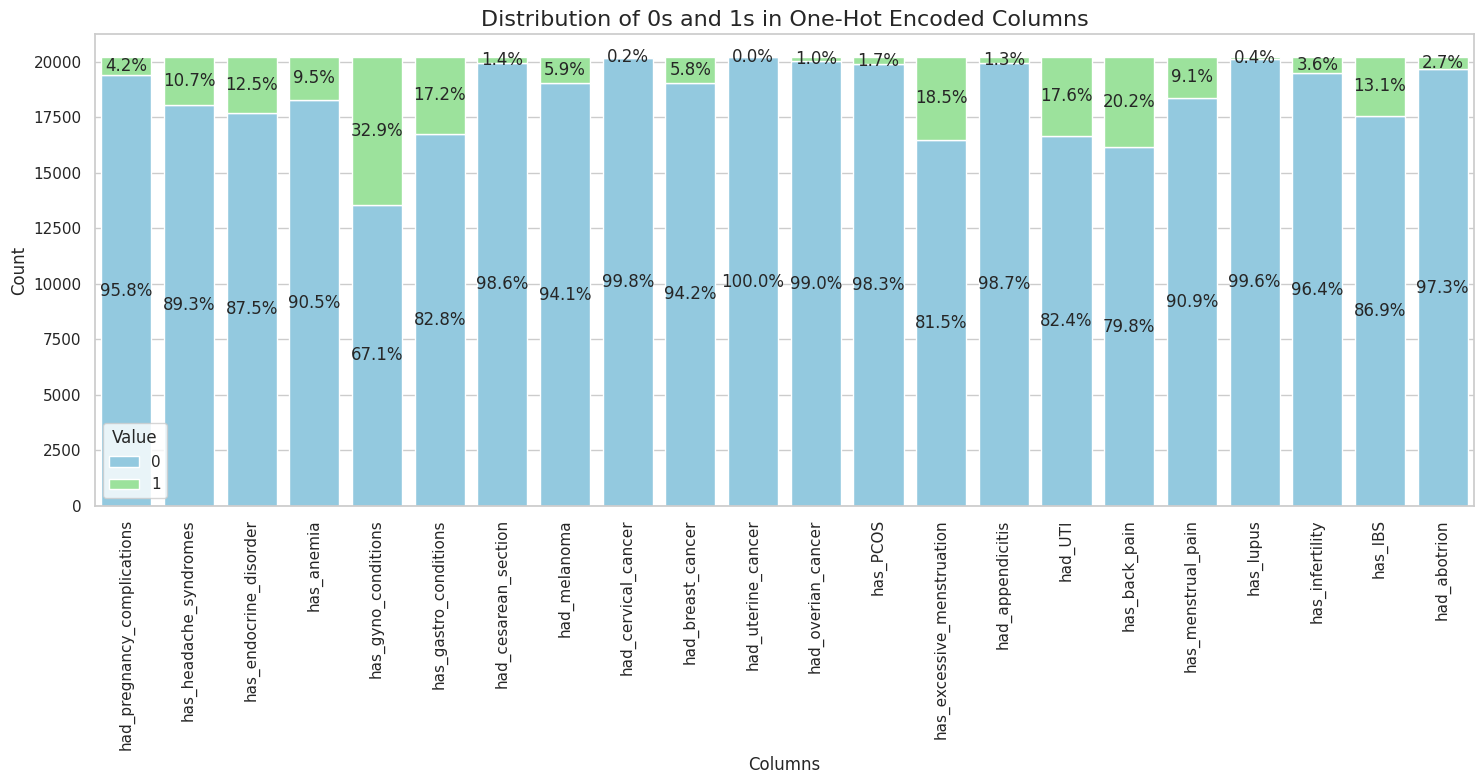

In [10]:
value_counts = df[cohort.cat_cols]
plot_one_hot_columns(value_counts, 'Distribution of 0s and 1s in One-Hot Encoded Columns', 'Columns', 'Count')

# Check for sparse columns

In [7]:
null_precentages = get_null_precentages(df)
left_align(null_precentages.head(20))

,0
Number of weeks (in the last year) at work suffering because of IBS,96.790000
Age diabetes diagnosed,96.780000
Source of report of N97 (female infertility),96.280000
"Number of weeks absent from work due to IBS, in the last year",92.590000
Stomach/abdominal pain for 3+ months,86.340000
Hip pain in last three months and rating of pain,80.630000
Back pain in last three months and rating of pain,80.630000
Depression possibly related to childbirth,77.810000
Feelings of tiredness during worst episode of depression,77.810000
Age at first episode of depression,77.810000


In [8]:
nan_counts = pd.DataFrame(df.isna().sum())
nan_counts.index = nan_counts.index.to_series().apply(code_to_feature)
nan_counts = nan_counts.reset_index()
nan_counts.columns = ['Feature', 'NaN count']
nan_counts = nan_counts[~nan_counts['Feature'].isin(cohort.cat_cols)]

In [9]:
nan_counts = nan_counts.sort_values(by='NaN count', ascending=False)

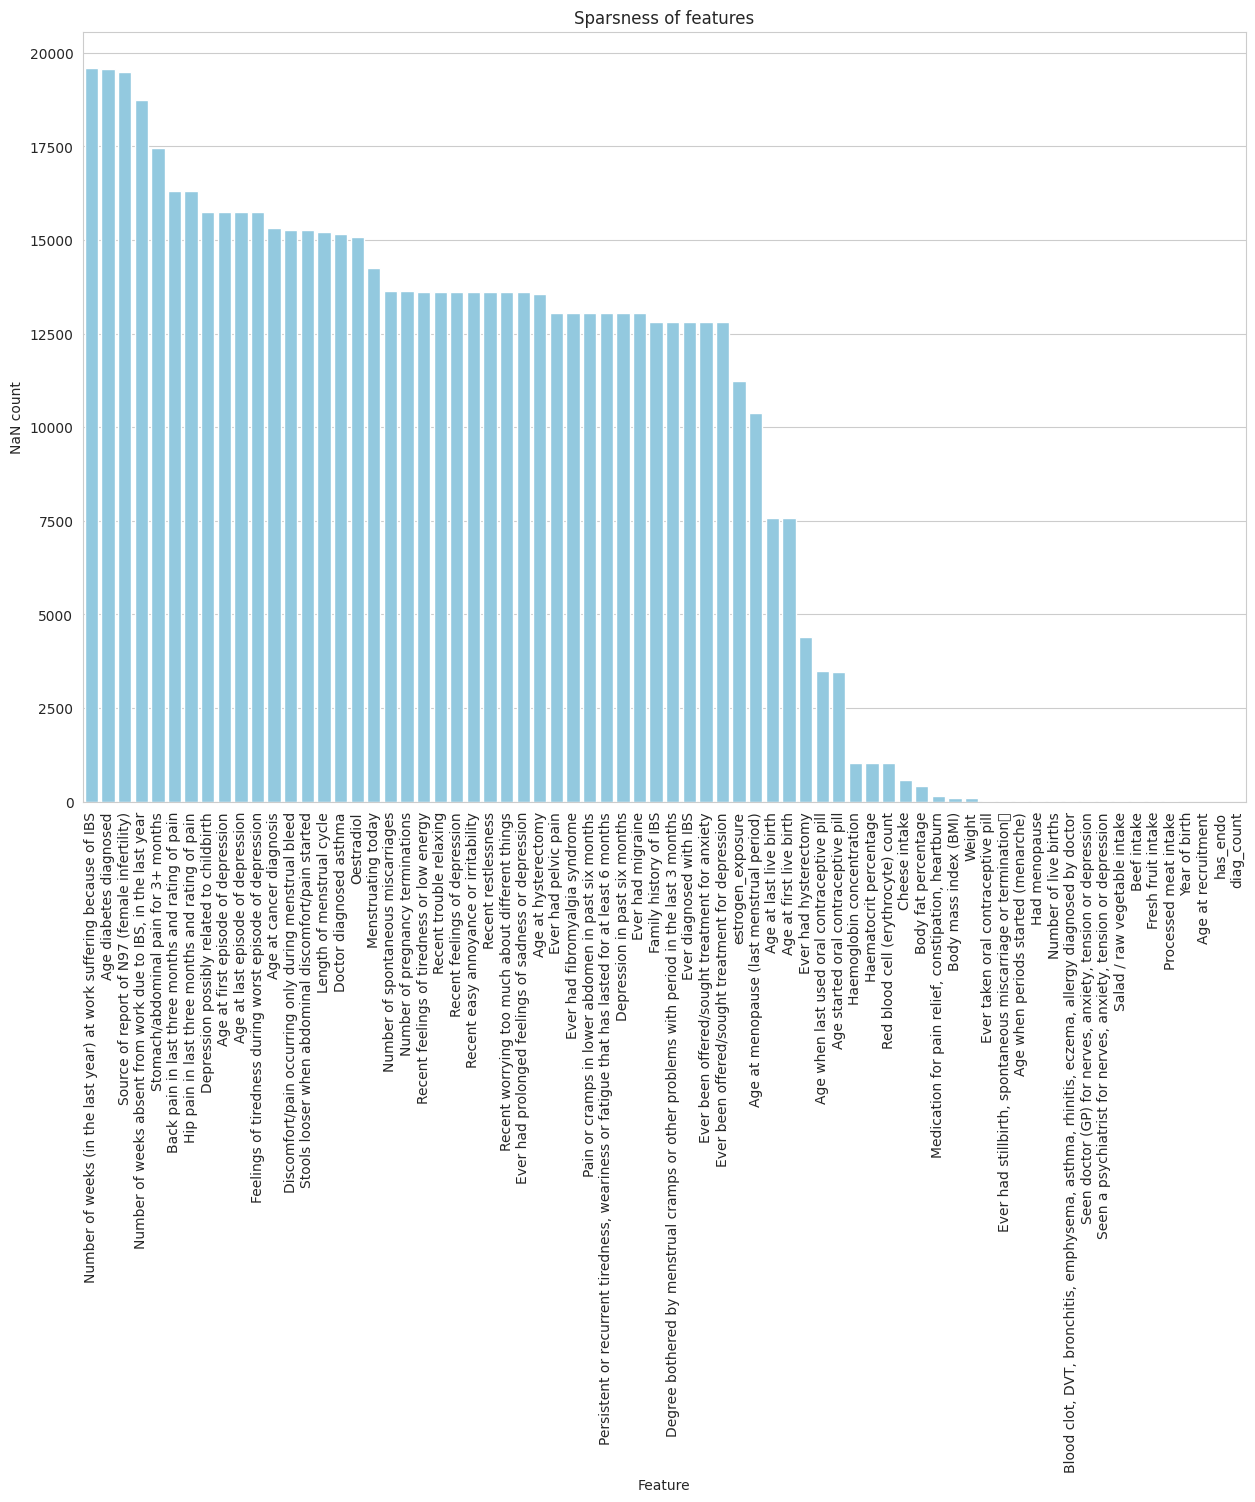

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.barplot(x='Feature', y='NaN count', data=nan_counts, color='skyblue')
plt.title('Sparsness of features')
plt.xticks(rotation=90)
plt.show()

### Remove features that have more than 90% NaN values

In [16]:
threashold = len(df) * 0.1
df = df.dropna(thresh=threashold, axis=1)

In [17]:
df.shape

(20232, 88)

# Check correlations

In [18]:
df_corr = df.corr().abs()
df_corr.columns = df_corr.columns.to_series().apply(code_to_feature)

### Get the top 20 features with the highest correlation to our label

In [57]:
df_corr.iloc[-1].sort_values(ascending=False)[1:20]

has_gastro_conditions                                  0.255714
had_UTI                                                0.213494
has_anemia                                             0.153963
has_back_pain                                          0.144164
Body mass index (BMI)                                  0.120483
Body fat percentage                                    0.109321
Medication for pain relief, constipation, heartburn    0.108803
has_endocrine_disorder                                 0.102233
Weight                                                 0.098891
Age at recruitment                                     0.096591
Age at cancer diagnosis                                0.096000
Year of birth                                          0.095450
Age at first live birth                                0.093117
has_gyno_conditions                                    0.087882
has_IBS                                                0.086469
estrogen_exposure                       

### Find features that are highly correlated to each other

In [24]:
corr_mat = df.corr().abs()
corr_mat.columns = corr_mat.columns.to_series().apply(code_to_feature)
corr_mat.index = corr_mat.index.to_series().apply(code_to_feature)

In [25]:
corr_mat = corr_mat.unstack().sort_values(ascending=False).drop_duplicates()
corr_mat = corr_mat[corr_mat < 1.0]
corr_mat_df = pd.DataFrame(corr_mat)
corr_mat_df.style.set_properties(**{'text-align': 'left'})
left_align(corr_mat_df.head(20))

,,0
Age at recruitment,Year of birth,0.993309
estrogen_exposure,Age at menopause (last menstrual period),0.959953
Haematocrit percentage,Haemoglobin concentration,0.929709
Weight,Body mass index (BMI),0.920854
Body mass index (BMI),Body fat percentage,0.852188
Weight,Body fat percentage,0.824275
Haematocrit percentage,Red blood cell (erythrocyte) count,0.760308
Age at hysterectomy,estrogen_exposure,0.748222
Red blood cell (erythrocyte) count,Haemoglobin concentration,0.679583
Age at first live birth,Age at last live birth,0.679222


Drop highly correlated features

In [26]:
df.drop([feature_to_code('Age at recruitment'), feature_to_code('Haemoglobin concentration'), feature_to_code('Body fat percentage')], axis=1, inplace=True)

### Find correlations between features

Correlation between number of births and hysterectomy

In [27]:
code = feature_to_code("births")

df[code] = df[code].apply(lambda x: 1 if x > 0 else 0)

df[code].value_counts()

2734-0.0
1    15622
0     4610
Name: count, dtype: int64

In [31]:
code = feature_to_code("hysterectomy")

df[code] = df[code].apply(lambda x: 1 if x > 0 else 0)

df[code].value_counts()

3591-0.0
0    17917
1     2315
Name: count, dtype: int64

In [29]:
births_code = feature_to_code("births")
hyster_code = feature_to_code("hysterectomy")

df.groupby([births_code, hyster_code]).size().reset_index(name='count').rename(columns={births_code: 'Gave birth', hyster_code:'Had hysterectomy'})

,Gave birth,Had hysterectomy,count
0,0,0,4223
1,0,1,387
2,1,0,13694
3,1,1,1928


Average Hysterectomy age

In [32]:
age_at_hysterectomy_code = feature_to_code("Age at hysterectomy")
df[age_at_hysterectomy_code].mean()

43.195472942587315

Correlation between endo and hysterectomy

In [33]:
has_endo_code = "has_endo"
hyster_code = feature_to_code("hysterectomy")

df.groupby([has_endo_code, hyster_code]).size().reset_index(name='count').rename(columns={has_endo_code: 'Has Endo', hyster_code:'Had hysterectomy'})

,Has Endo,Had hysterectomy,count
0,0,0,9434
1,0,1,682
2,1,0,8483
3,1,1,1633


In [34]:
df[has_endo_code].corr(df[hyster_code])

0.14766323286450503

In [35]:
df[births_code].corr(df[hyster_code])

0.052005954967813954

Correlation between hysterectomy and cancer

In [36]:
cancer_codes = ['had_cervical_cancer','had_uterine_cancer', 'had_overian_cancer']
df['had_cancer'] = pd.DataFrame(df[cancer_codes]).any(axis=1).astype(int)
df['had_cancer'].corr(df[hyster_code])

0.052473733254746864

In [37]:
df.groupby(['had_cancer', hyster_code]).size().reset_index(name='count').rename(columns={has_endo_code: 'Has Endo', hyster_code:'Had hysterectomy'})

,had_cancer,Had hysterectomy,count
0,0,0,17724
1,0,1,2247
2,1,0,193
3,1,1,68


In [38]:
had_menopause_code = feature_to_code("Had menopause")
had_hysterectomy_code = feature_to_code("Ever had hysterectomy")
age_at_hysterectomy_code = feature_to_code("Age at hysterectomy")
age_at_menopause_code = feature_to_code("Age at menopause")

df.drop(columns=[had_menopause_code, had_hysterectomy_code, age_at_hysterectomy_code, age_at_menopause_code, 'had_cancer'], inplace=True)

# Splitting to X and y

In [39]:
cohort.df = df

In [40]:
cohort.split_x_y()
X = cohort.X
y = cohort.y

In [41]:
print(f"X shape - {X.shape}")
print(f"y shape - {y.shape}")

X shape - (20232, 80)
y shape - (20232,)


# Advanced Data Preproccessing

### Cleansing with VarianceThreshold

In [42]:
from sklearn.feature_selection import VarianceThreshold

# Run on binary features only
binary_features = [col for col in X.columns if set(X[col].unique()) == {0, 1}]

vt = VarianceThreshold(threshold=0.05)
vt.fit_transform(X[binary_features], y)

low_variance_columns = dict([(col, vt.variances_[idx]) for idx, col in enumerate(X[binary_features]) if col not in X[binary_features].columns[vt.get_support()]])

print(f"Going to drop {len(low_variance_columns)} features")
for col, variance in low_variance_columns.items():
    print(f"{code_to_feature(col)} - {variance:.4f}")

Going to drop 10 features
had_pregnancy_complications - 0.0418
had_cesarean_section - 0.0132
had_overian_cancer - 0.0105
had_uterine_cancer - 0.0004
had_cervical_cancer - 0.0019
had_abotrion - 0.0273
has_infertility - 0.0358
has_lupus - 0.0038
had_appendicitis - 0.0121
has_PCOS - 0.0157


In [71]:
#X.drop(columns=low_variance_columns.keys(), inplace=True)

# Splitting to train and test

### Splitting to train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Running CatBoost on the initial dataset

In [44]:
from catboost import CatBoostClassifier

init_cb_model = CatBoostClassifier(iterations=500, learning_rate=0.01, depth=12, loss_function='Logloss')
init_cb_model.fit(X_train, y_train)
init_y_pred = init_cb_model.predict(X_test)

print('\nInitial CatBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, init_y_pred)))

0:	learn: 0.6895624	total: 136ms	remaining: 1m 7s
1:	learn: 0.6863397	total: 225ms	remaining: 56.1s
2:	learn: 0.6830813	total: 306ms	remaining: 50.7s
3:	learn: 0.6798650	total: 387ms	remaining: 48s
4:	learn: 0.6766505	total: 469ms	remaining: 46.4s
5:	learn: 0.6734186	total: 548ms	remaining: 45.1s
6:	learn: 0.6701979	total: 628ms	remaining: 44.2s
7:	learn: 0.6664860	total: 713ms	remaining: 43.8s
8:	learn: 0.6634939	total: 793ms	remaining: 43.3s
9:	learn: 0.6605862	total: 874ms	remaining: 42.8s
10:	learn: 0.6575015	total: 956ms	remaining: 42.5s
11:	learn: 0.6548087	total: 1.03s	remaining: 42s
12:	learn: 0.6523681	total: 1.11s	remaining: 41.7s
13:	learn: 0.6498185	total: 1.2s	remaining: 41.5s
14:	learn: 0.6470188	total: 1.27s	remaining: 41.2s
15:	learn: 0.6442496	total: 1.35s	remaining: 41s
16:	learn: 0.6416922	total: 1.43s	remaining: 40.7s
17:	learn: 0.6391303	total: 1.51s	remaining: 40.5s
18:	learn: 0.6365927	total: 1.59s	remaining: 40.3s
19:	learn: 0.6341159	total: 1.67s	remaining: 40.

#### Feature importance

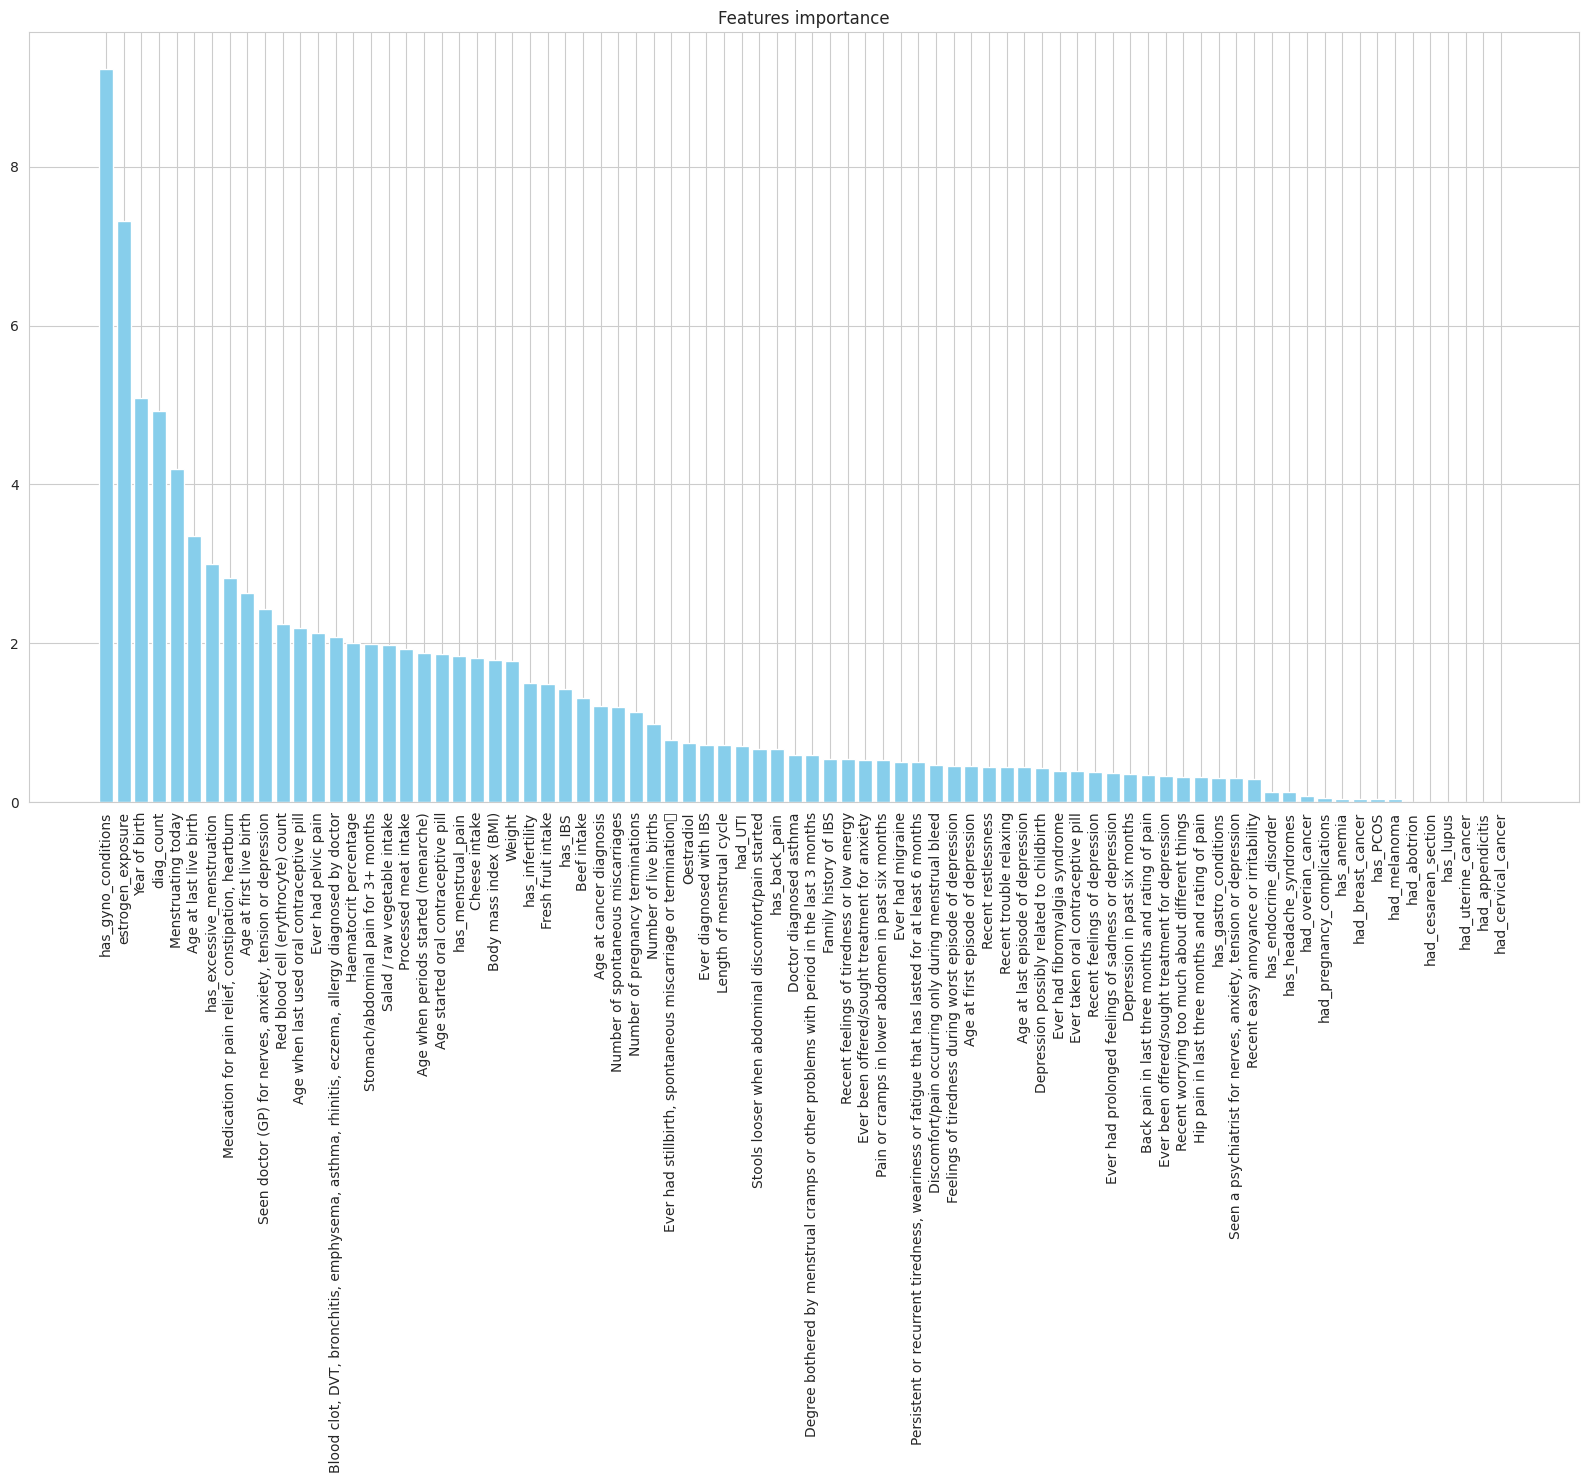

In [45]:
importances = init_cb_model.get_feature_importance()

features = X.columns.to_series().apply(code_to_feature)
sorted_indices = np.argsort(importances)[::-1]

sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.bar(range(len(features)), importances[sorted_indices], color='skyblue')
plt.xticks(range(len(features)), features[sorted_indices], rotation=90)
plt.title("Features importance")
plt.show()

## Imputing the data

We tried several inputation methods, the best was mean imputer

In [46]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# imputer = SimpleImputer(strategy="mean")
# imputer = SimpleImputer(strategy="median")
# imputer = SimpleImputer(strategy="most_frequent")
# imputer = KNNImputer(n_neighbors=7)

In [47]:
transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
])

X_imp = pd.DataFrame(transformer.fit_transform(X), columns=X.columns)

In [48]:
X_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20232 entries, 0 to 20231
Data columns (total 80 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Year of birth                                                                                  20232 non-null  float64
 1   Salad / raw vegetable intake                                                                   20232 non-null  float64
 2   Fresh fruit intake                                                                             20232 non-null  float64
 3   Processed meat intake                                                                          20232 non-null  float64
 4   Beef intake                                                                                    20232 non-null  float64
 5   Cheese intake     

### Splitting to train and test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.3, shuffle=True, random_state=42)

# Model Selection (After Imputation)

In [50]:
from model_selection import ModelSelector

In [54]:
model_selector = ModelSelector()
model_selector.train_models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Training CatBoost model
Training XGBoost model
Training Logistic Regression model
Training SVM model
Training Neural Network model
Training Random Forest model


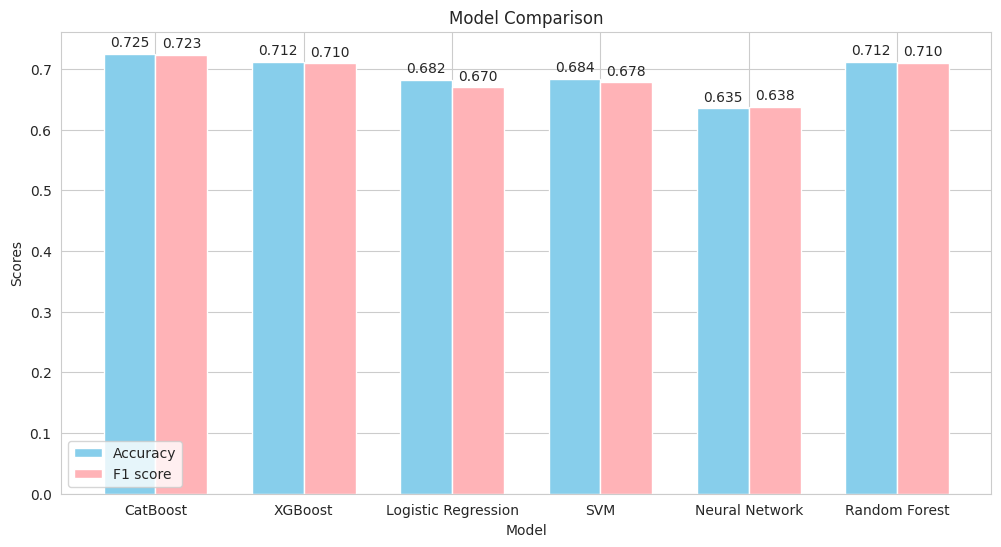

In [55]:
model_selector.plot_results()

In [56]:
model_selector.best_model_name

'CatBoost'

## Selected Model

In [48]:
model = model_selector.best_model

#### Confusion Matrix

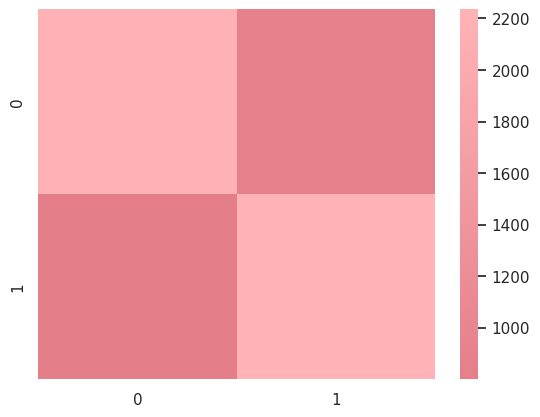

In [56]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

cm = confusion_matrix(y_test, y_pred)
colors = ['#AC102A', '#FFB3B7']
custom_cmap = LinearSegmentedColormap.from_list("custom", colors)

sns.heatmap(cm, center=True, cmap=custom_cmap)
plt.show()

# Shap

In [57]:
import shap

explainer = shap.TreeExplainer(model)
explanation = explainer(X_test)

shap_values = explanation.values

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - y_pred).max()

1.5730313198289756

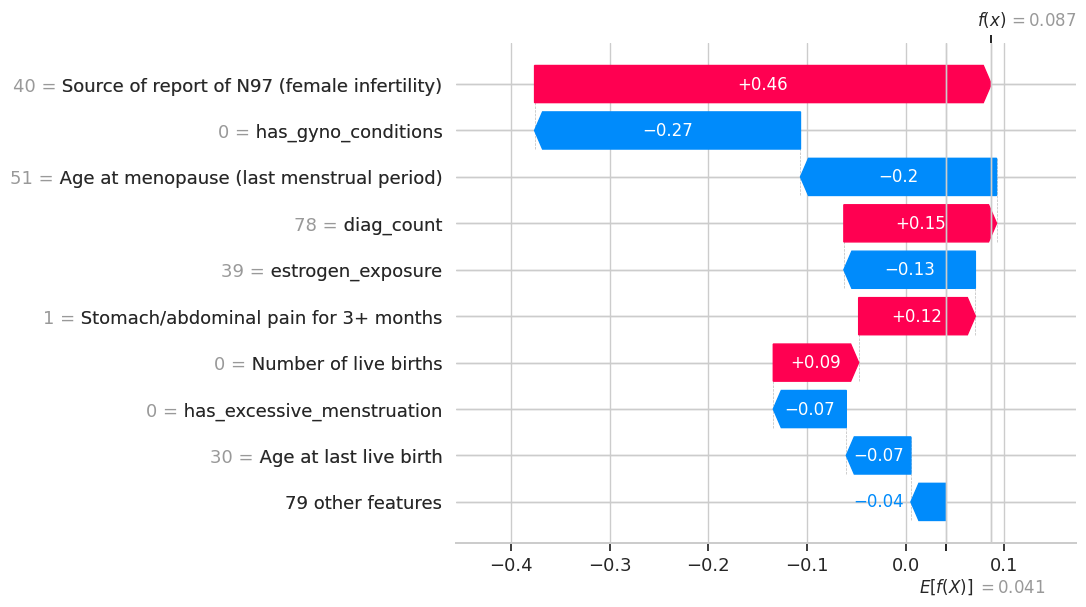

In [58]:
shap.plots.waterfall(explanation[0])

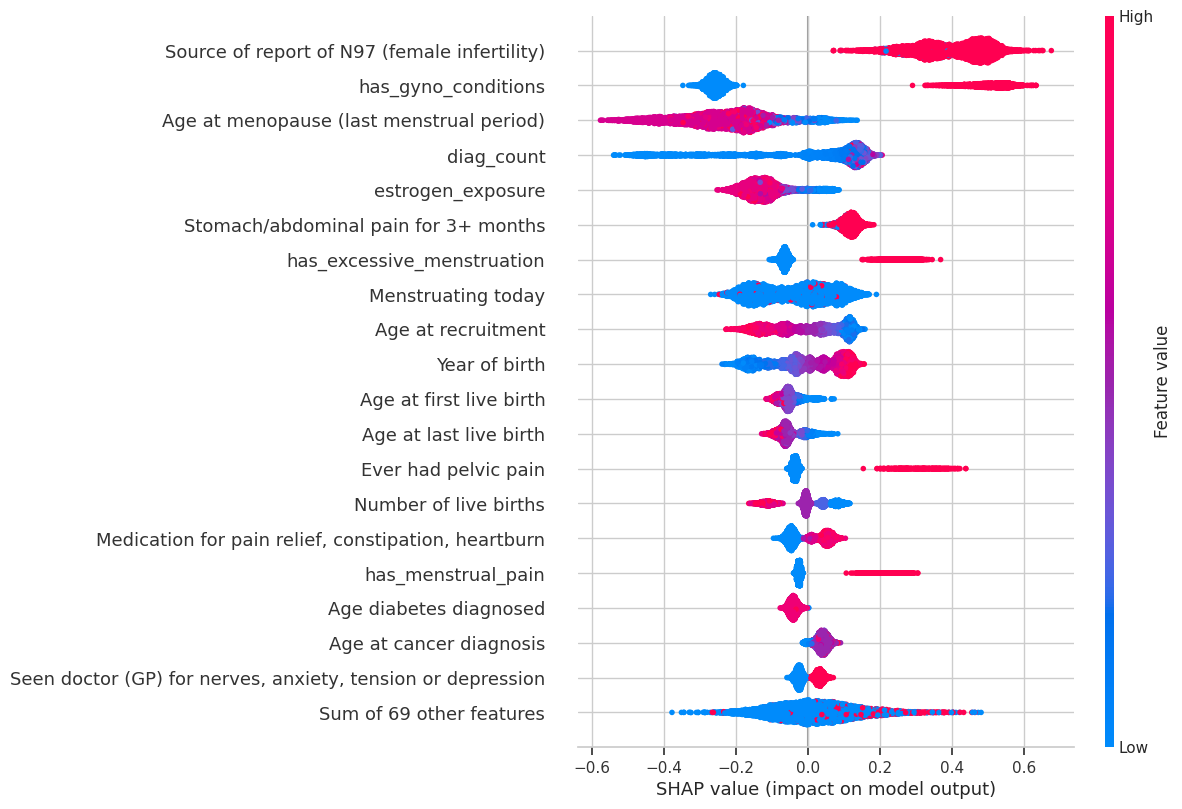

In [60]:
shap.plots.beeswarm(explanation, max_display=20)